# Import the main libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import missingno as msno

# Sklearn
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import xgboost

: 

# Load the DataSet and look at the big picture

In [3]:
# Read the csv file using pandas
path_file = os.path.join(os.getcwd(),'housing.csv')
df_housing = pd.read_csv(path_file)
# Show the head of the DF
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Check some info about the DataSet (see Nulls and DataTypes)
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Show some statistics about the DataSet
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# Check the nulls
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:>

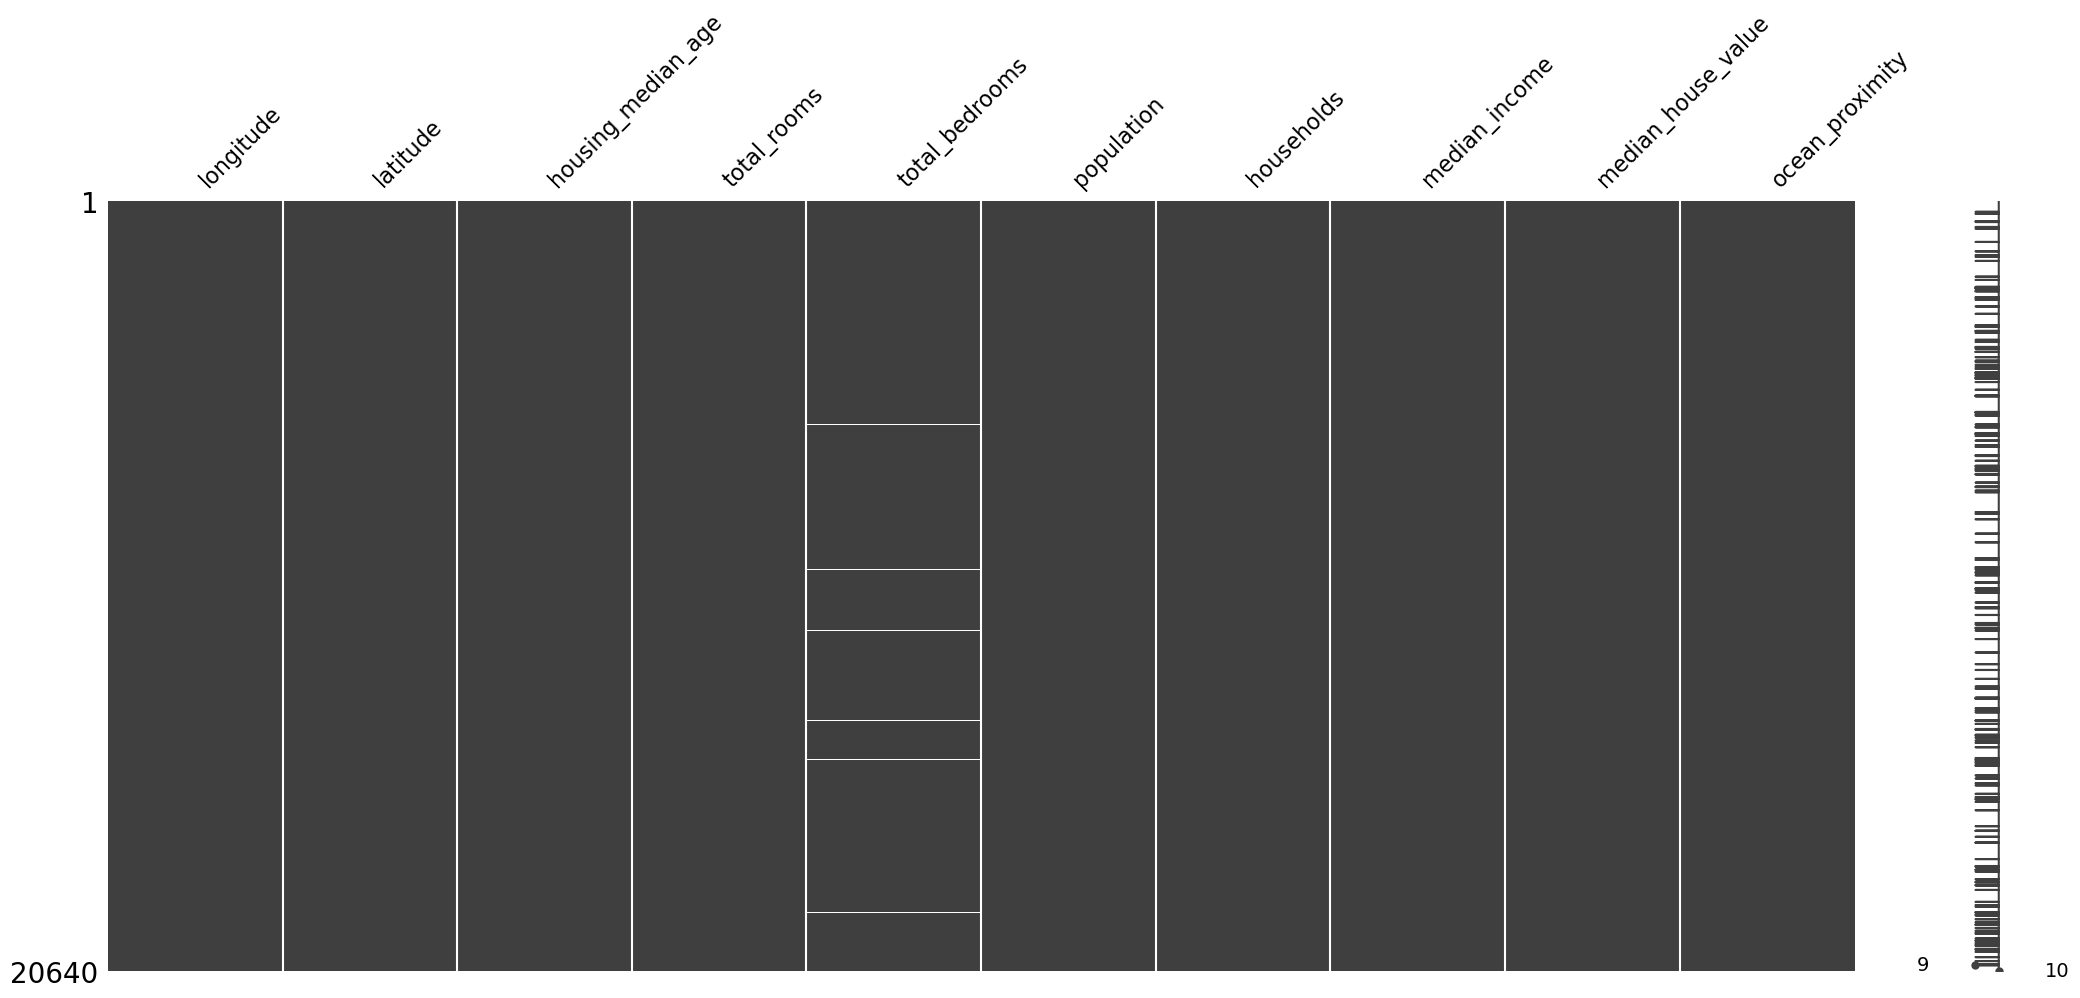

In [7]:
# check nulls using (missingno) library -- take care of the sum of above each bar
msno.matrix(df_housing)

* `Comment: It seems that DateSet contains 20640 instances and only 207 null values in total_bedrooms feature, and also all datatypes are float64 as they are continuous numerical features except the Ocean_proximity column which is nominal categorical feature.`

# `Exploratory Data Analysis`

## `Univariate Visualization`

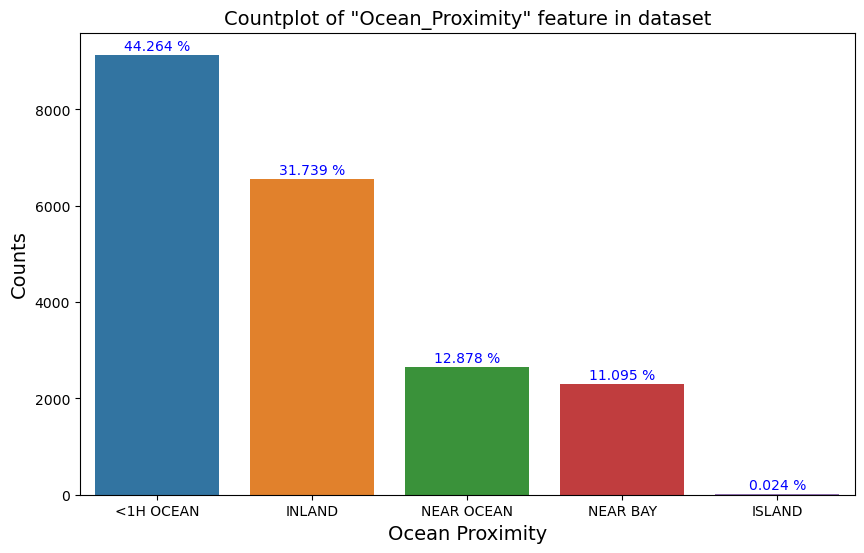

In [8]:
# Check the distribution of Ocean_proximity feature in DataSet
Ocean_Values = df_housing['ocean_proximity']
replicates = df_housing['ocean_proximity'].value_counts()
# Plotting
plt.figure(figsize=(10,6))
sns.countplot(x='ocean_proximity', data=df_housing, order=replicates.index)
plt.title('Countplot of "Ocean_Proximity" feature in dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
for i in range (len(replicates)):
    each_count = replicates.values[i]
    each_text = f'{each_count*100/len(df_housing):.3f} %'
    plt.text(x= i, y= each_count+100, s=each_text, ha='center', c='b')
plt.show()

In [9]:
# Replace the (<1H Ocean) to 1H Ocean -- will cause errors in deployment
df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN', inplace=True)

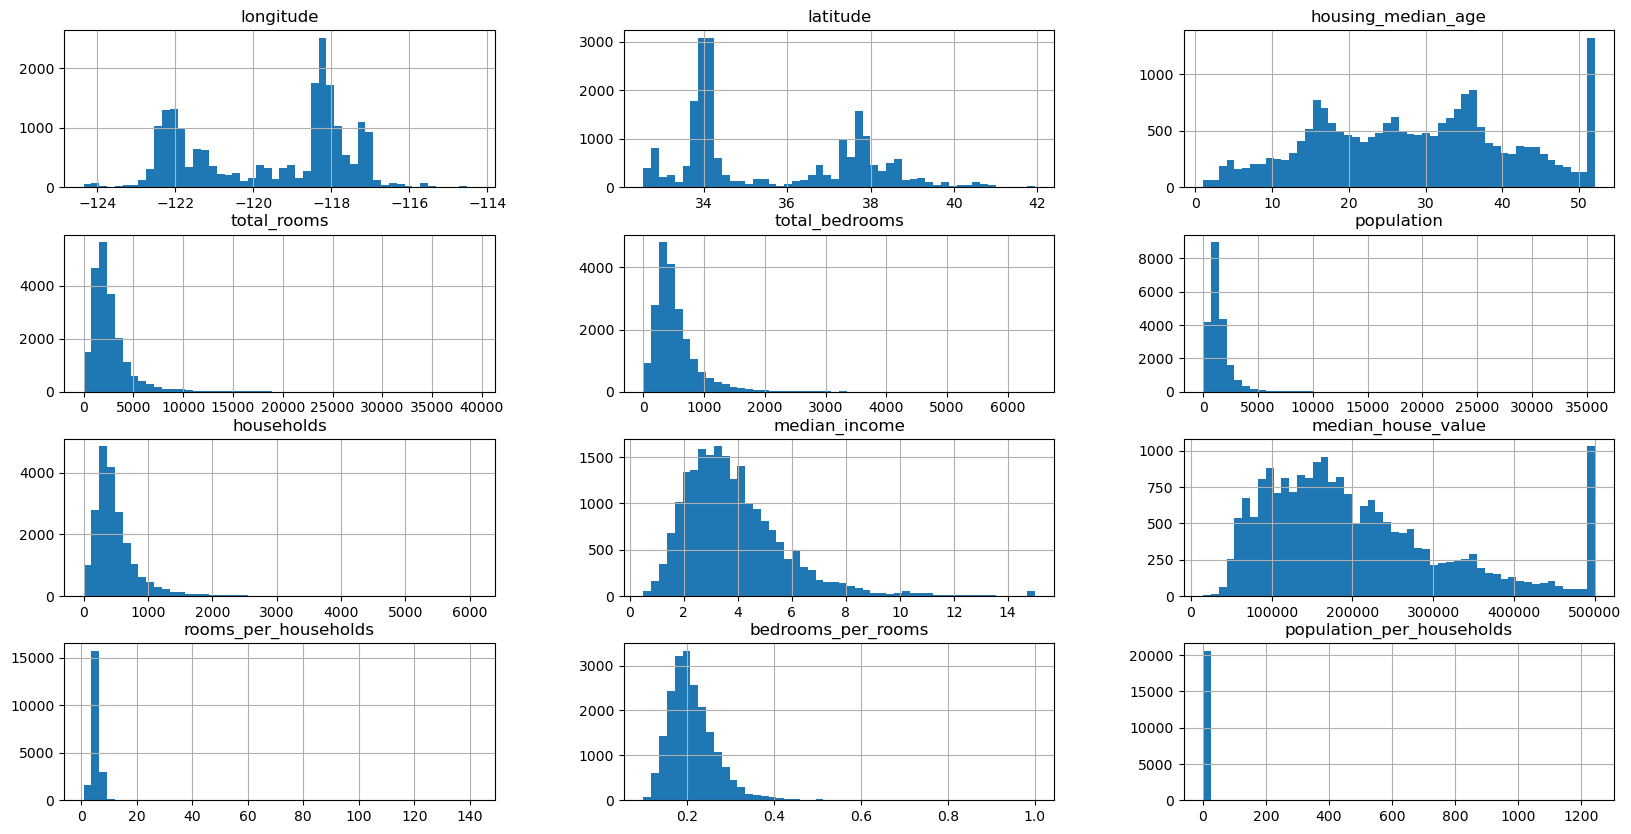

In [128]:
# Histogram distribution of Numerical features in datasets
df_housing.hist(bins=50, figsize=(20,10))
plt.show()

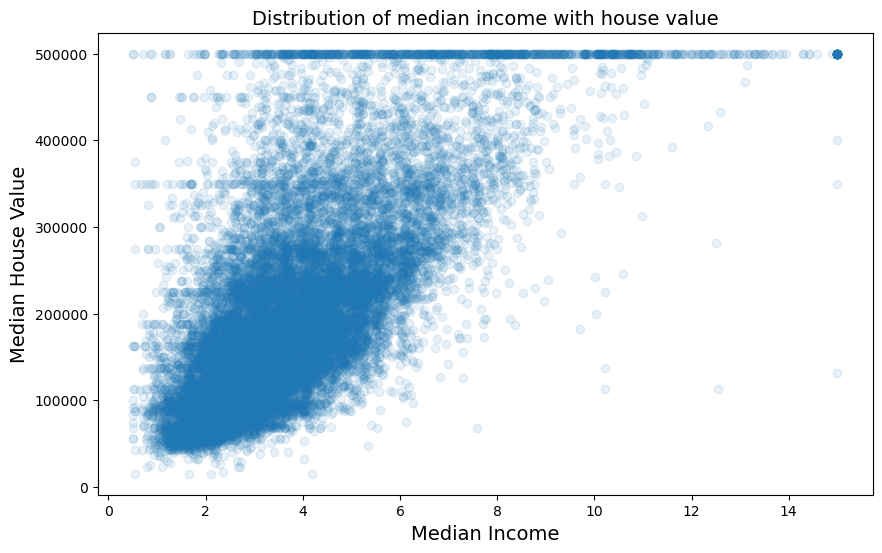

In [11]:
# Scatterplot with important feature (median_income) with the target (median_house_value)
plt.figure(figsize=(10,6))
plt.scatter(x='median_income', y='median_house_value', data=df_housing, alpha=0.1)
plt.title("Distribution of median income with house value", c='k', fontsize=14)
plt.xlabel("Median Income", c='k', fontsize=14)
plt.ylabel("Median House Value", c='k', fontsize=14)
plt.show()

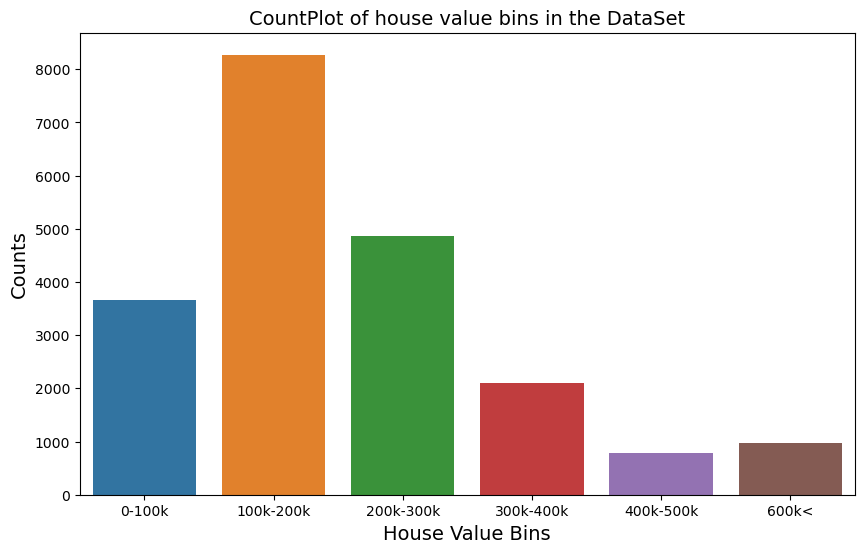

In [12]:
# Try for (median_house_vaue) to convert it into chunks (bins)
# Cut this numerical feature to categorical one
# EX: For the following examlpe -- any value between range (0 - 100k) will be the same category like histogram
house_value_bins = pd.cut(df_housing['median_house_value'], bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf], labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '600k<'])
plt.figure(figsize=(10,6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of house value bins in the DataSet', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

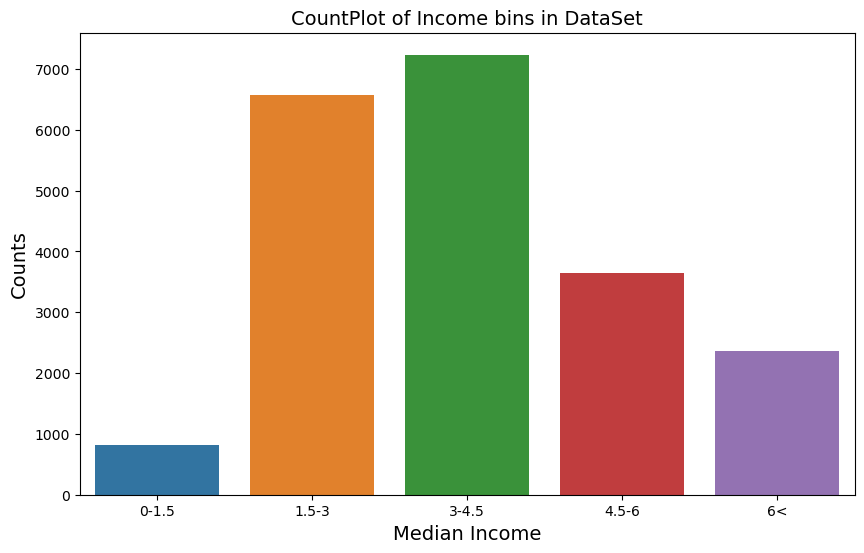

In [13]:
# Let's try the same above code for median_income, I think it is very important feature
income_bins = pd.cut(df_housing['median_income'], bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

# CountPlot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income bins in DataSet', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

* > `Comment: It seems that the (<1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median income) but use (income bins) as the stratified`

## `Bivariate Visualization`

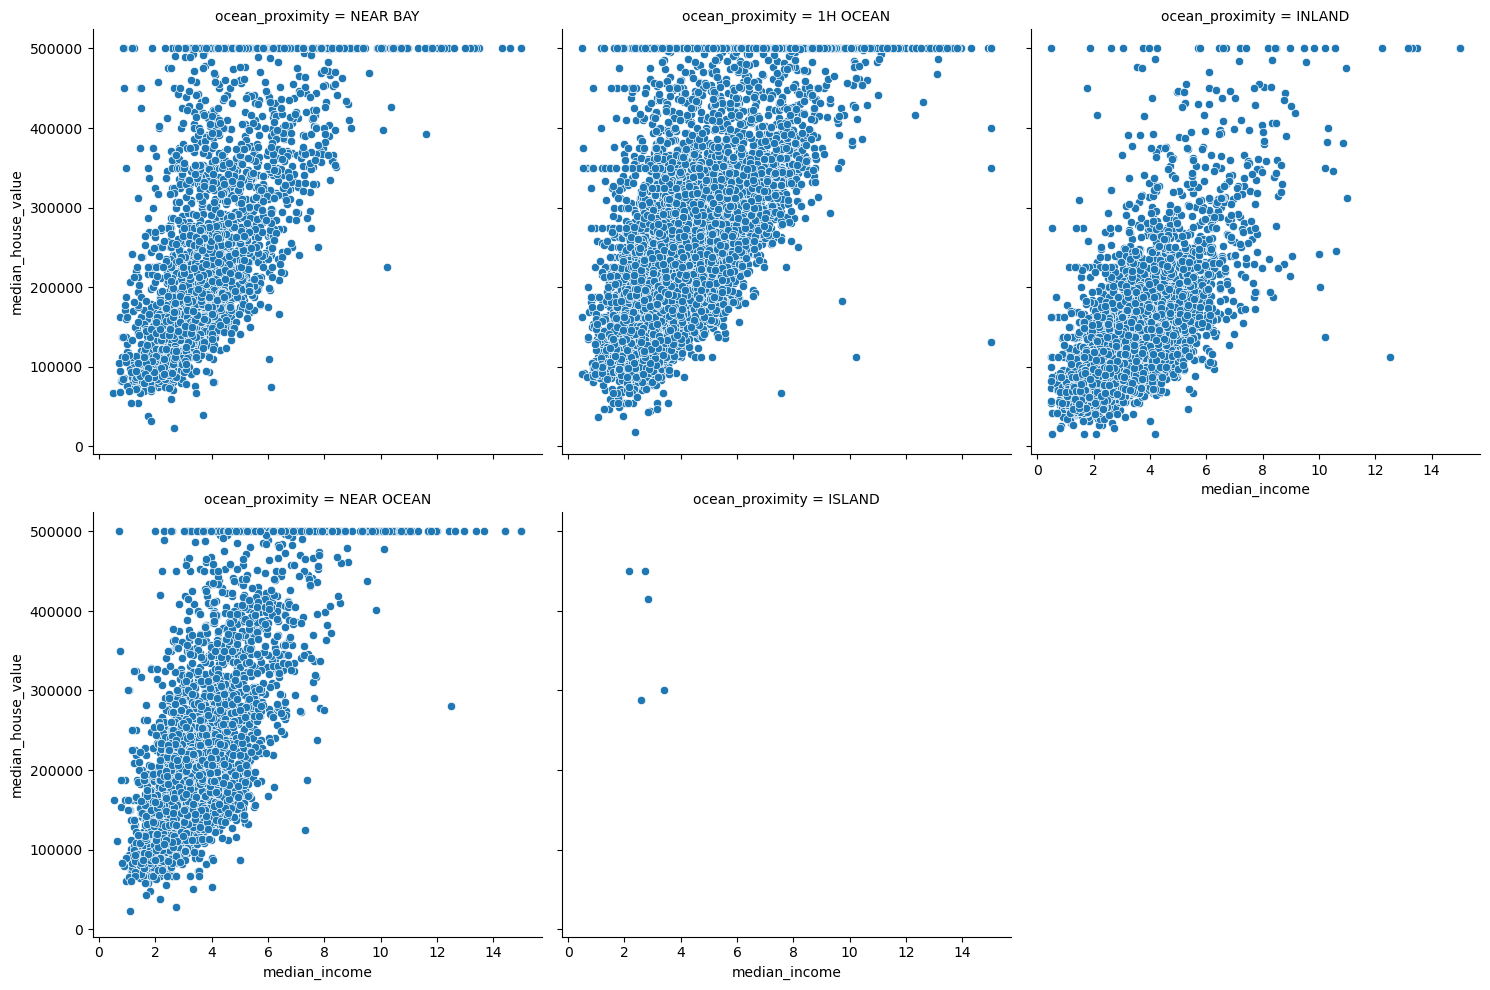

In [14]:
# Scatter plot with (median_income) and (median_house_value) at each (ocean_proximity)
sns.relplot(kind='scatter', x='median_income', y='median_house_value', data=df_housing, col='ocean_proximity', col_wrap=3)
plt.show()

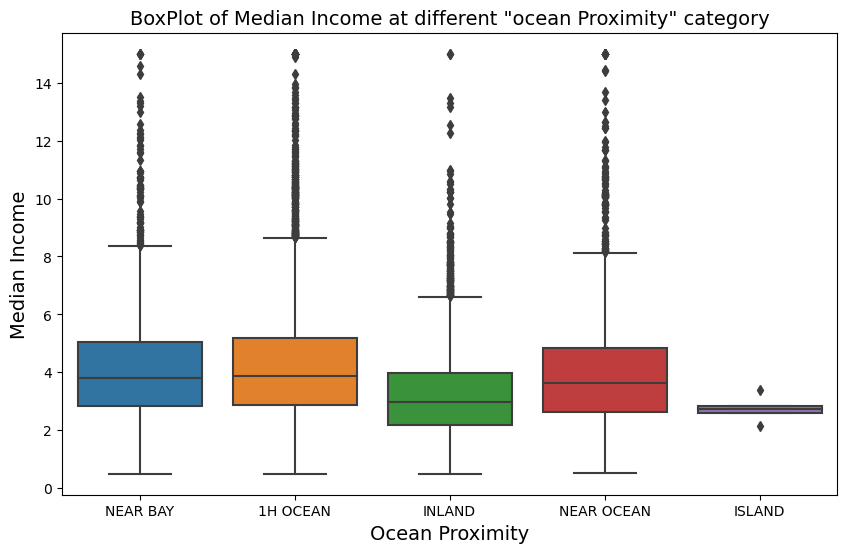

In [15]:
# Check the boxplot of the (median_income) at different categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', x='ocean_proximity', data=df_housing)
plt.title('BoxPlot of Median Income at different "ocean Proximity" category', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

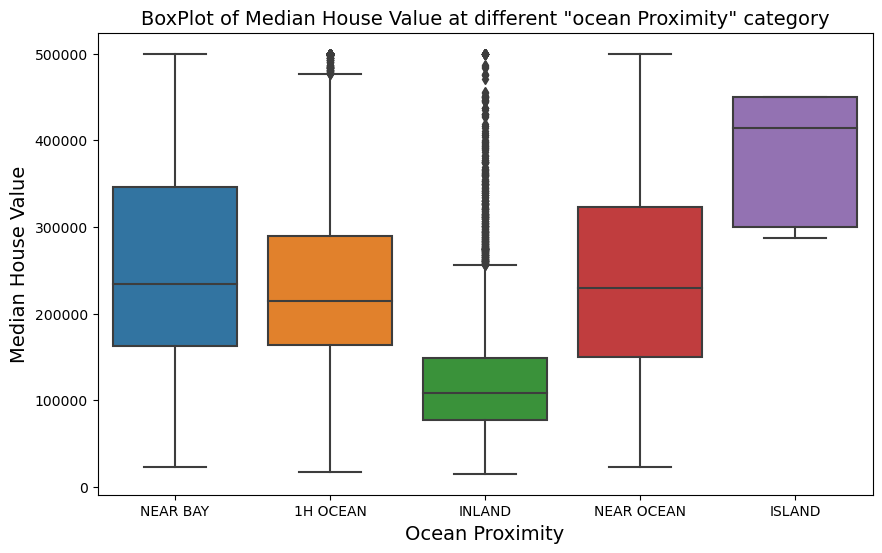

In [16]:
# Check the boxplot for (median_house_value) at different categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', x='ocean_proximity', data=df_housing)
plt.title('BoxPlot of Median House Value at different "ocean Proximity" category', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

* > `Comment: It seems the Distribution of Median_Income is almost the same at ocean_proximity categories, also, it seems that the INLAND median_income and median_house_value is less than other categories and it makes sense`

## `Multivariate Visualization`

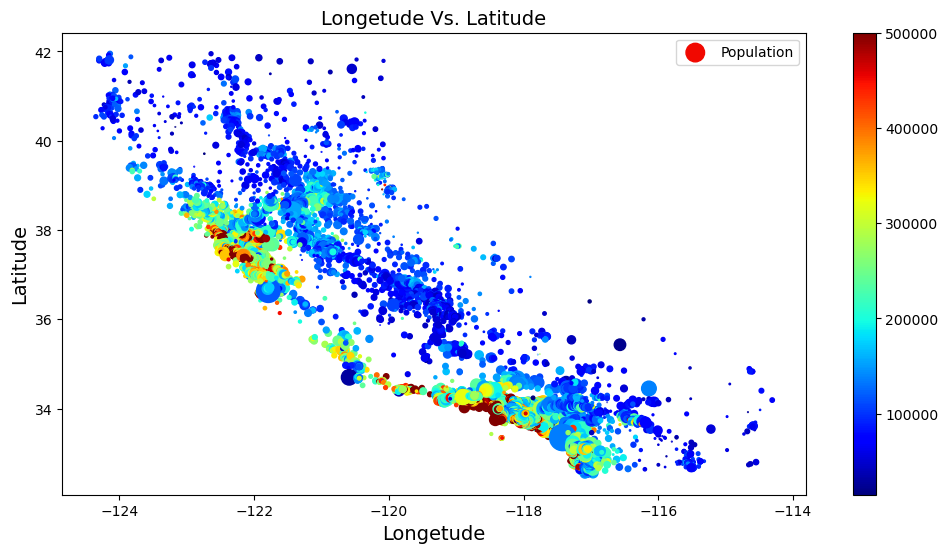

In [17]:
# Scatterplot for (longetude and latitude), and add population as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x='longitude', y='latitude', data=df_housing, s=df_housing['population']/100, c=df_housing['median_house_value'],
            cmap=plt.get_cmap('jet'), label='Population')
plt.colorbar(sc)
plt.title("Longetude Vs. Latitude", fontsize=14, c='k')
plt.xlabel("Longetude", fontsize=14, c='k')
plt.ylabel("Latitude", fontsize=14, c='k')
plt.legend()
plt.show()

## `Check the Correlation between Features and Target`

In [18]:
# using pearson correlation
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

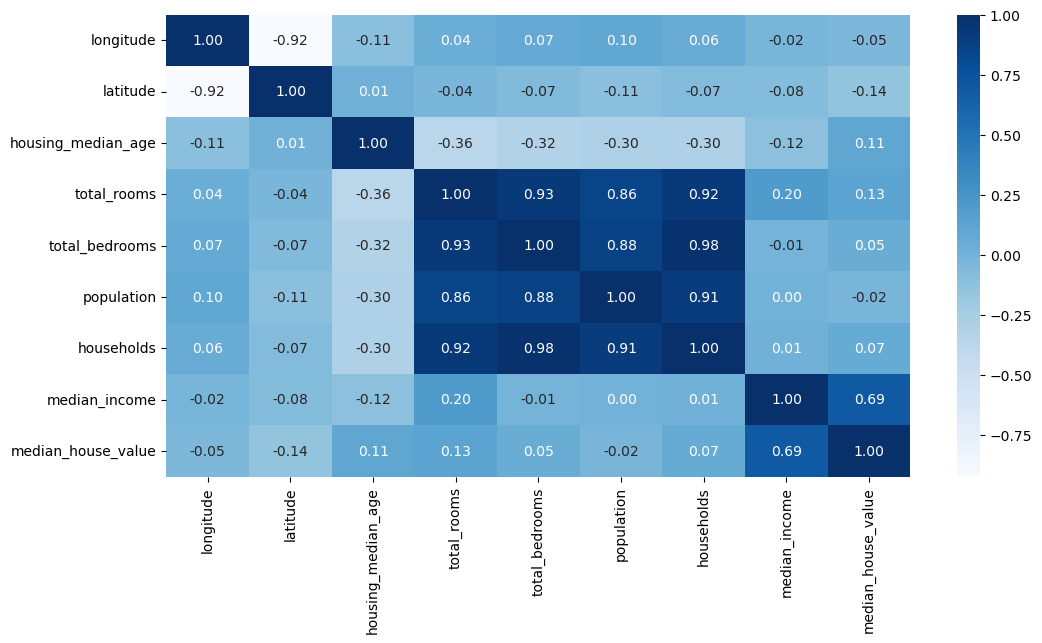

In [19]:
# you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_housing.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

* > `Comment: It seems that the most correlated feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated`

# `Feature Engineering`
#### `Try to add some features, thinking that it will be more useful and more correlated to the target`

In [20]:
# Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_households']=df_housing['total_rooms'] / df_housing['households']
df_housing['bedrooms_per_rooms']=df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_households']=df_housing['population'] / df_housing['households']

In [21]:
# Check the correlation again
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688075
rooms_per_households         0.151948
total_rooms                  0.134153
housing_median_age           0.105623
households                   0.065843
total_bedrooms               0.049686
population_per_households   -0.023737
population                  -0.024650
longitude                   -0.045967
latitude                    -0.144160
bedrooms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

* > `Comment: Some progress for out new features (very good), strong correlation `

# `Split the DataSet`
#### `I Split the DataSet uding ordinary method (Random method) not (stratified method)`

In [22]:
# split the whole DataSet to Features & Target
X = df_housing.drop(columns='median_house_value', axis=1)
y = df_housing['median_house_value']

In [23]:
# Random split the DataSet to two sets (train_set, Test_set)
# For validation --> I will use cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

# Check shapes for the sets
print("X_train shape -- ", X_train.shape)
print("X_test shape -- ", X_test.shape)
print("y_train shape -- ", y_train.shape)
print("y_test shape -- ", y_test.shape)

X_train shape --  (17544, 12)
X_test shape --  (3096, 12)
y_train shape --  (17544,)
y_test shape --  (3096,)


* `Notes in sklearn, Read Carefully:`
    * `.fit --> means that the instance you created istrying to learn or train`
    * `.transform --> means that the instance you created has learned and now tinme to apply what it learned by transfoerming`
    * `.fit_transform --> means the two above steps in one step, and don't use this method excepting with trainnig data`
    * `We fit to train the data, and after it learns we transform (train, valid, test)`
    * `In order --> (.fit) then (.transform) to training data or (.fit_transform) in one step`
    * `In other meaning --> only (.transform) to other data after learning to training data`

## `Dealing with nulls`

In [24]:
# Seperate the columns according to types (numerical and categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'int32', 'float64', 'float32']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['int64', 'int32', 'float64', 'float32']]
categ_cols

['ocean_proximity']

In [25]:
# What about imputing nulls using (median) --> using SimpleImputer
imputer =SimpleImputer(strategy='median')
X_train_filled = imputer.fit_transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

# `Standardize the Features`

In [26]:
# Using StandardScaler for each feature to be (mean=0, std=1)
# This technique helps for better training and to converge faster and put all features in the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)  # train
X_test_scaled = scaler.transform(X_test_filled)   # test

## `Pipeline for numerical features -- I will use it in this project`
### `Building a pipeline is much easier and better while inference at new dataset`

In [27]:
# building pipeline for numerical variables
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])
# Deal with (num_pipeline) as an instance -- fit and transform to train dataset and transform only to other dataset
X_train_num = num_pipeline.fit_transform(X_train[num_cols])    # train
X_test_num = num_pipeline.transform(X_test[num_cols])   # test

## `Categorical Features`
##### `Categorical features should be encoded before being passed to the model, there are more than one type of encoding`
  * `Label encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column`
  * `Ordinal encoding: mapping ordinal categories start from 0 to the length of categories but ordered 0<1<2< ...`
  * `OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category      in mentioned`

In [28]:
# Let's use here for (ocean_proximity) --> use Label Encoder (Try to use OHE)
lbl_encoder = LabelEncoder()
lbl_encoder.fit(np.squeeze(X_train[categ_cols].values))

X_train_encoded = lbl_encoder.transform(np.squeeze(X_train[categ_cols].values))   # learn and transform for train
X_test_encoded = lbl_encoder.transform(np.squeeze(X_test[categ_cols].values))     # transform only for test

# Let's use OneHotEncoding
ohe = OneHotEncoder()
ohe.fit(X_train[categ_cols].values)

X_train_encoded = lbl_encoder.transform(np.squeeze(X_train[categ_cols].values))   # learn and transform for train
X_test_encoded = lbl_encoder.transform(np.squeeze(X_test[categ_cols].values))     # transform only for test

## `Pipeline for categorical features -- I will use it in this project`

* `Use OHE -> it is preferable to use OHE when encoding for features, but if you are encoding for the target, you MUST encode using labelEncoder, except in Deep Learning we can use OHE for target, but for now, you can use LabelEncoder, OrdinalEncoder or OneHotEncoder for Features and only LabelEncoder for target --- Take care of this note`

In [29]:
# define pipeline for categorical columns --> use OneHotEncoder = OHE
categ_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
                               ('ohe', OneHotEncoder(sparse=False))])

# Deal with categ_pipeline is an instance -- fit and transform to train dataset and transform only to other dataset
X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])

## `Get all together`

* `Now we have outputs from numerical pipeline and categorical pipeline`
* `We have to solutions:`
    * `Concatenate the features (Numerical after processing) and (Encoded categorical features)`
    * `You can use (FeatureUnion or Coulumn transformer) provided in sklearn`

In [30]:
# We can get much easier like the following
num_pipeline = Pipeline(steps=[('selector', DataFrameSelector(num_cols)),
                               ('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler())])

categ_pipeline = Pipeline(steps=[('selector', DataFrameSelector(categ_cols)),
                                 ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
                                 ('ohe', OneHotEncoder(sparse=False))])

total_pipeline = FeatureUnion(transformer_list=[('num', num_pipeline), ('categ', categ_pipeline)])


# Deal with categ_pipeline is an instance -- fit and transform to train dataset and transform only to other dataset
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)   # Every thing is processed

## `Building ML Models`
##### `Evaluation Metric: RMSE`

### `1. LinearRegression`

In [31]:
# LinearRegression -- Regression using Ordinary Least Squares (OLS) method
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [32]:
mse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_lin = mse_scores_lin * -1
rmse_score_lin = np.sqrt(mse_scores_lin)
rmse_score_lin.mean()

67880.14257788868

In [33]:
# check scores of this model (RMSE) using (cross_val_score)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train,
                                 cv=5, method='predict')

### `2. SGDRegressor`

In [59]:
# Define the model -- Initialize some random hyperparameters --> We will tune them later
sgd_reg = SGDRegressor(penalty='l2', shuffle=True, alpha=0.0001, max_iter=10000, random_state=42, eta0=0.0001)
sgd_reg.fit(X_train_final, y_train)

SGDRegressor(eta0=0.0001, max_iter=10000, random_state=42)

In [60]:
# Check scores of this model (RMSE) using (cross_val_score)
mse_scores_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_sgd = mse_scores_sgd * -1
rmse_score_sgd = np.sqrt(mse_scores_sgd)
rmse_score_sgd.mean()

67951.9675221288

### `3. Ridge`
##### `Regression using Ordinary Least Squares, but Regularized version of LinearRegression using (L2 Norm)`

In [61]:
# Define Ridge model (Regularized version of LinearRegression)
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train_final, y_train)  # train the model

Ridge(alpha=0.9, solver='cholesky')

In [62]:
# Check scores of this model (RMSE) using (cross_val_score)
mse_scores_ridge = cross_val_score(estimator=ridge_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_ridge = mse_scores_ridge * -1
rmse_score_ridge = np.sqrt(mse_scores_ridge)
rmse_score_ridge.mean()

67880.21922984188

### `4. Lasso`
##### `Regression using Ordinary Least Squares, but Regularized version of LinearRegression using (L1 Norm)`

In [64]:
# Define Lasso model (Regularized version of LinearRegression)
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train)  # train the model

Lasso(alpha=1, max_iter=100000)

In [65]:
# Check the weights using Lasso, and ridge --- Lasso is a Features Selection model? why?
mse_scores_lasso = cross_val_score(estimator=lasso_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_lasso = mse_scores_lasso * -1
rmse_score_lasso = np.sqrt(mse_scores_lasso)
rmse_score_lasso.mean()

67879.97230187681

### `5. ElasticNet`
##### `Regression using Ordinary Least Squares, but Regularized version of LinearRegression using (L1 Norm & L2 Norm)`

In [106]:
# Define ElasticNet model (Regularized version of LinearRegression)
elastic_reg = ElasticNet(alpha=1, l1_ratio=0.9)
elastic_reg.fit(X_train_final, y_train)  # train the model

ElasticNet(alpha=1, l1_ratio=0.9)

In [107]:
# Check the weights using Lasso, and ridge --- Lasso is a Features Selection model? why?
mse_scores_elastic = cross_val_score(estimator=elastic_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_elastic = mse_scores_elastic * -1
rmse_score_elastic = np.sqrt(mse_scores_elastic)
rmse_score_elastic.mean()

69603.81986345883

### `6. PolynomialRegression`

In [114]:
# We can try to use PolynomialRegression
poly_feat = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_feat.fit_transform(X_train_final)

In [115]:
# Pass the above new poly Features to the model -- bias is included in model itself -- don't add it twice
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_train)

LinearRegression()

In [116]:
# Check scores of this model (RMSE) using (cross_val_score)
# Check the weights using Lasso, and ridge --- Lasso is a Features Selection model? why?
mse_scores_poly = cross_val_score(estimator=lin_reg_poly, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_poly = mse_scores_poly * -1
rmse_score_poly = np.sqrt(mse_scores_poly)
rmse_score_poly.mean()

67880.14257788868

### `7. KNN`

In [119]:
# Using KNN, low n_neighbors -> Overfitting & high n_neighbors -> Underfitting
knn_reg = KNeighborsRegressor(n_neighbors=6, weights='uniform', p=2, metric='minkowski')
knn_reg.fit(X_train_final, y_train)

KNeighborsRegressor(n_neighbors=6)

In [120]:
# Check scores of this model (RMSE) using (cross_val_score)
mse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_knn = mse_scores_knn * -1      #we want it positive
rmse_score_knn = np.sqrt(mse_scores_knn)
print(f"RMSE score using KNN --- {np.round(rmse_score_knn, 4)}")
print(f"Mean of RMSE score using KNN --- {rmse_score_knn.mean(): .4f}")

print('****'*30)

# Get prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, method='predict', cv=5)

# You can check the (RMSE) using what model predicts and compare it with the mean of above result -- almost the same
# Take care of this point --> don't use .predict when you are using (Cross_Validation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction using KNN --- {rmse_pred_knn: .4f}')    # almost the same result

RMSE score using KNN --- [61716.6169 62099.3189 60883.1409 59936.0617 61775.7635]
Mean of RMSE score using KNN ---  61282.1804
************************************************************************************************************************
RMSE after prediction using KNN ---  61287.1640


### `8. Random Forest`

In [124]:
# Using RF ---> a lot of hyperparameters but the dominant (n_estimator, max_depth)
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6,max_samples=.8, random_state=42)
forest_reg.fit(X_train_final, y_train)

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150,
                      random_state=42)

In [131]:
# Check scores of this model (RMSE) using (cross_val_score)
mse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_forest = mse_scores_forest * -1      #we want it positive
rmse_score_forest = np.sqrt(mse_scores_forest)
print(f"RMSE score using Random Forest --- {np.round(rmse_score_forest, 4)}")
print(f"Mean of RMSE score using Random Forest --- {rmse_score_forest.mean(): .4f}")

print('****'*30)

# Get prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, method='predict', cv=5)

# You can check the (RMSE) using what model predicts and compare it with the mean of above result -- almost the same
# Take care of this point --> don't use .predict when you are using (Cross_Validation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction using Random Forest --- {rmse_pred_forest: .4f}')    # almost the same result

RMSE score using Random Forest --- [58925.9674 61130.1728 60472.2879 58330.2278 60989.7339]
Mean of RMSE score using Random Forest ---  59969.6780
************************************************************************************************************************
RMSE after prediction using Random Forest ---  59980.3194


### `RF Tuning`

In [134]:
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                   n_iter=20, random_state=422, scoring='neg_mean_squared_error', cv=5, verbose=6)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2391187635.752 total time=   8.4s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2781205995.392 total time=   8.4s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2645155556.888 total time=   8.3s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2418477575.713 total time=   8.4s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2556063413.546 total time=   8.5s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2492709737.035 total time=  13.5s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2884779798.841 total time=  13.0s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2755109200.857 total time=  13.0s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2509031588.719 total time=  13.4s
[C

[CV 5/5] END max_depth=4, max_samples=1, n_estimators=150;, score=-13489042553.576 total time=   0.0s
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2384896179.131 total time=  21.0s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2759362249.987 total time=  21.8s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2648709690.778 total time=  21.6s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2414566168.514 total time=  20.7s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=350;, score=-2539287365.132 total time=  19.9s
[CV 1/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-2969350121.079 total time=  10.6s
[CV 2/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3285813274.305 total time=  10.7s
[CV 3/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-3182203195.062 total time=  10.7s
[CV 4/5] END max_depth=8, max_samples=0.8, n_estimators=300;, score=-

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [135]:
best_forest = search_random_forest.best_estimator_

In [152]:
# Check scores of this model (RMSE) using (cross_val_score)
mse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_tuned_forest = mse_scores_tuned_forest * -1      #we want it positive
rmse_score_tuned_forest = np.sqrt(mse_scores_tuned_forest)
print(f"RMSE score using tuned Random Forest --- {np.round(rmse_score_tuned_forest, 4)}")
print(f"Mean of RMSE score using tuned Random Forest --- {rmse_score_tuned_forest.mean(): .4f}")

print('****'*30)

# Get prediction using (cross_val_predict)
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, method='predict', cv=5)

# You can check the (RMSE) using what model predicts and compare it with the mean of above result -- almost the same
# Take care of this point --> don't use .predict when you are using (Cross_Validation)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction using tuned Random Forest --- {rmse_pred_tuned_forest: .4f}')    # almost the same result

RMSE score using tuned Random Forest --- [48550.1057 52281.4938 51246.7275 48834.964  50251.959 ]
Mean of RMSE score using tuned Random Forest ---  50233.0500
************************************************************************************************************************
RMSE after prediction using tuned Random Forest ---  50252.9752


### `Feature Importance using RF`

In [138]:
# Getting the features importance (they are normalized in RF, sum=1)
feat_import_forest = {}
for name, score in zip(num_cols, best_forest.feature_importances_[:11]):
    feat_import_forest[name] = score

In [141]:
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()

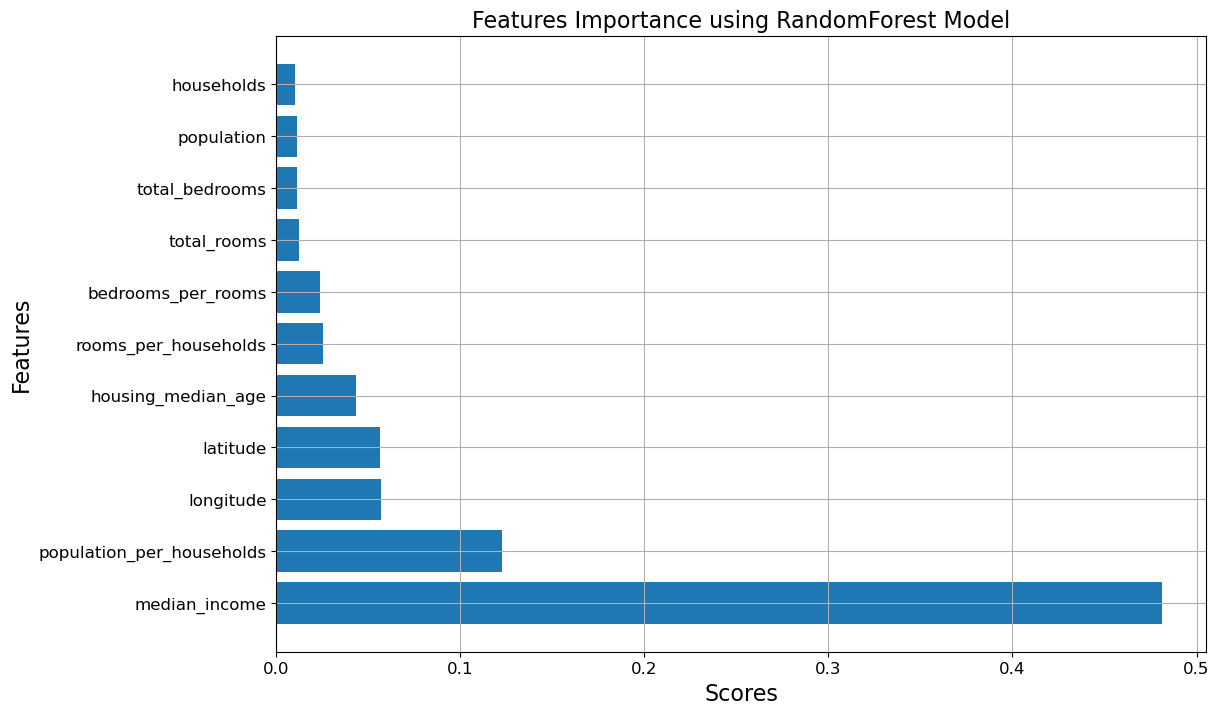

In [148]:
# To DF and plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='scores', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['scores'])
plt.title('Features Importance using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

### `9. XGBoost`

In [150]:
# using the hero API -->
xgb_reg = xgboost.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8, )
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [153]:
# Check scores of this model (RMSE) using (cross_val_score)
mse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_xgb = mse_scores_xgb * -1      #we want it positive
rmse_score_xgb = np.sqrt(mse_scores_xgb)
print(f"RMSE score using tuned Random Forest --- {np.round(rmse_score_xgb, 4)}")
print(f"Mean of RMSE score using tuned Random Forest --- {rmse_score_xgb.mean(): .4f}")

print('****'*30)

# Get prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, method='predict', cv=5)

# You can check the (RMSE) using what model predicts and compare it with the mean of above result -- almost the same
# Take care of this point --> don't use .predict when you are using (Cross_Validation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction using tuned Random Forest --- {rmse_pred_xgb: .4f}')    # almost the same result

RMSE score using tuned Random Forest --- [46257.3372 48079.2801 48091.8238 45795.9642 48237.5764]
Mean of RMSE score using tuned Random Forest ---  47292.3963
************************************************************************************************************************
RMSE after prediction using tuned Random Forest ---  47303.8912


### `Tuning XGBoost`

In [154]:
# Let's trying tuning XGBoost using GridSearchCV -- needs a lot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, scoring='neg_mean_squared_error', verbose=6)
grid_xgb.fit(X_train_final, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2435370122.441 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2563263783.762 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2529909876.961 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2380119584.916 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8;, score=-2675330996.869 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2411196652.784 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2532509295.384 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9;, score=-2484357209.1

[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9;, score=-2086540541.185 total time=   0.8s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.9;, score=-2256795941.057 total time=   0.8s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8;, score=-2052609350.086 total time=   1.0s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8;, score=-2341582926.477 total time=   1.1s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8;, score=-2195299354.152 total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8;, score=-2096749323.478 total time=   1.2s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8;, score=-2213380621.761 total time=   1.1s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.9;, score=-2058596217.734 total time=   1.1s
[CV 2/5] END learning_rate=0.1, 

[CV 3/5] END learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9;, score=-2279174186.889 total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9;, score=-2138338918.018 total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=4, n_estimators=150, subsample=0.9;, score=-2389401996.940 total time=   0.1s
[CV 1/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-2100575706.587 total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-2312435917.836 total time=   0.1s
[CV 3/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-2267412606.582 total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-2140587537.433 total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8;, score=-2303807454.207 total time=   0.1s
[CV 1/5] END learning_rate=0.2, max_dept

[CV 2/5] END learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.9;, score=-2483613046.309 total time=   1.9s
[CV 3/5] END learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.9;, score=-2514878203.330 total time=   2.0s
[CV 4/5] END learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.9;, score=-2238412388.873 total time=   1.9s
[CV 5/5] END learning_rate=0.2, max_depth=12, n_estimators=100, subsample=0.9;, score=-2413065803.949 total time=   1.9s
[CV 1/5] END learning_rate=0.2, max_depth=12, n_estimators=150, subsample=0.8;, score=-2243592685.880 total time=   2.6s
[CV 2/5] END learning_rate=0.2, max_depth=12, n_estimators=150, subsample=0.8;, score=-2572287284.348 total time=   2.6s
[CV 3/5] END learning_rate=0.2, max_depth=12, n_estimators=150, subsample=0.8;, score=-2436737033.896 total time=   2.7s
[CV 4/5] END learning_rate=0.2, max_depth=12, n_estimators=150, subsample=0.8;, score=-2268776554.200 total time=   2.7s
[CV 5/5] END learning_rate=0.2, 

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                

In [157]:
best_xgb = grid_xgb.best_estimator_
best_xgb.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [158]:
# Check scores of this model (RMSE) using (cross_val_score)
mse_scores_xgb_tuned = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train,
                                 cv=5, scoring='neg_mean_squared_error')
mse_scores_xgb_tuned = mse_scores_xgb_tuned * -1      #we want it positive
rmse_score_xgb_tuned = np.sqrt(mse_scores_xgb_tuned)
print(f"RMSE score using tuned Random Forest --- {np.round(rmse_score_xgb_tuned, 4)}")
print(f"Mean of RMSE score using tuned Random Forest --- {rmse_score_xgb_tuned.mean(): .4f}")

print('****'*30)

# Get prediction using (cross_val_predict)
y_pred_xgb_tuned = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, method='predict', cv=5)

# You can check the (RMSE) using what model predicts and compare it with the mean of above result -- almost the same
# Take care of this point --> don't use .predict when you are using (Cross_Validation)
rmse_pred_xgb_tuned = np.sqrt(mean_squared_error(y_train, y_pred_xgb_tuned))
print(f'RMSE after prediction using tuned Random Forest --- {rmse_pred_xgb_tuned: .4f}')    # almost the same result

RMSE score using tuned Random Forest --- [45156.6241 47290.7814 46324.3726 44948.1235 46516.5659]
Mean of RMSE score using tuned Random Forest ---  46047.2935
************************************************************************************************************************
RMSE after prediction using tuned Random Forest ---  46055.6158


### `Feature Importance using XGBoost`

> `Feature importance for tunned model of XGBoost`
* `Importane_types:`
    * `Weight: the number of times a feature is used to split the data across all trees. --> I used this method`
    * `gain: The average gain across all splits the feature is used in`
    * `cover: The average coverage across all splits the feature is used in`
    * `total_gain: The total gain across all splits the feature is used in`
    * `total_coverage: The total coverage across all splits the feature is used in`

In [184]:
# Using XGBoost to get the Feature Importance
# getand sort
feat_import_xgb = best_xgb.get_booster().get_score(importance_type='weight')  # the same as RF, but RF normalize
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')  # To DF
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename({'index': 'Features', 0: 'f_scores'})   # Some Modification

# Taking only the first Numerical 11 cols
df_feat_import_xgb = df_feat_import_xgb[:11]   

# # Some sort to plot
# df_feat_import_xgb['Features'] = num_cols
# #df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)

# # plotting
# plt.figure(figsize=(12, 8))
# plt.barh(y=df_feat_import_xgb['index'], width=df_feat_import_xgb['0'])
# plt.title('Features Importance using XGBoost Model', fontsize=16, c='k')
# plt.xlabel('f_scores using weight method', fontsize=16, c='k')
# plt.ylabel('Features', fontsize=16, c='k')
# plt.xticks(c='k', fontsize=12)
# plt.yticks(c='k', fontsize=12)
# plt.grid('on')
# plt.show()

### `Models Comparison`

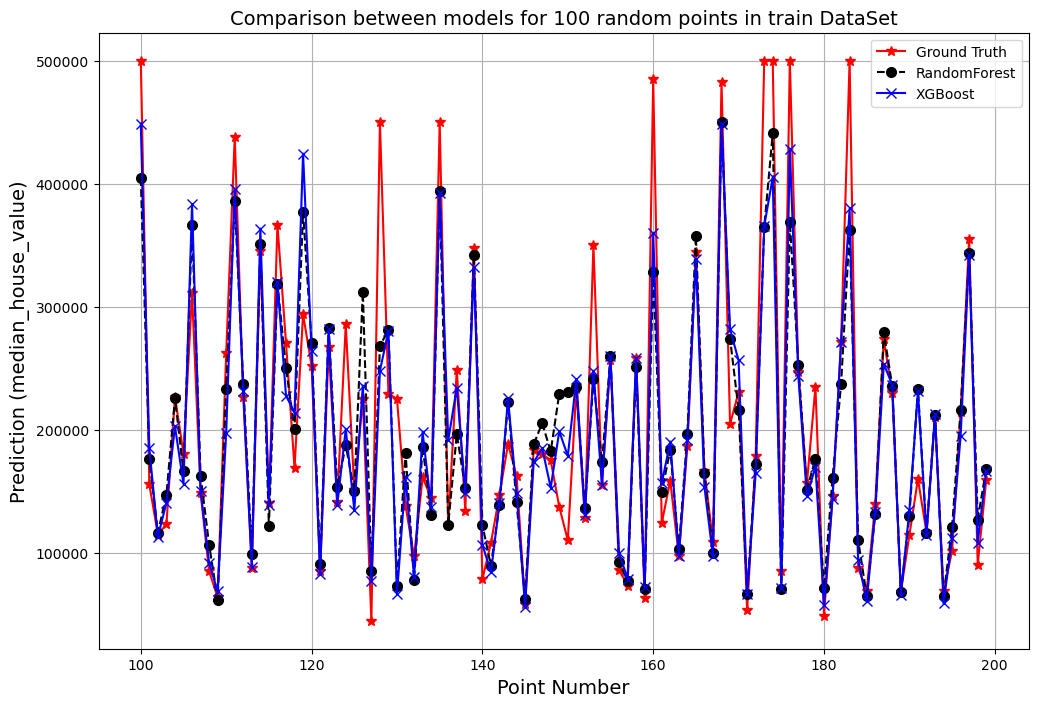

In [194]:
x_x = np.arange(100, 200)  # Random selected points
plt.figure(figsize=(12,8))
plt.plot(x_x,y_train.values[100:200], 'r*-', markersize=7, label='Ground Truth')
plt.plot(x_x,y_pred_tuned_forest[100:200], 'ko--', markersize=7, label='RandomForest')
plt.plot(x_x, y_pred_xgb_tuned[100:200], 'bx-', markersize=7, label='XGBoost')

plt.title('Comparison between models for 100 random points in train DataSet', fontsize=14, c='k')
plt.xlabel('Point Number', fontsize=14, c='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, c='k')
plt.legend()
plt.grid('on')
plt.show()

### `Download the best model -- best_xgb`

In [185]:
# Download using joblib
joblib.dump(best_xgb, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [196]:
# to load this pretrained model
loaded_model = joblib.load('model_XGBoost.pkl')

### `Inference on Test DataSet`

In [197]:
# Now we can touch test DataSet using (loaded_model == best_xgb) -- tuned XGBoost Model
y_pred_test = loaded_model.predict(X_test_final)

In [198]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

44880.94808999626